<a href="https://colab.research.google.com/github/FajarTampan37/ML/blob/main/PemodelanBenar_LSTM_Saham_Kimia_farma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import io
import numpy as np
import pandas as pd
import tensorflow as tf
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
# download the data
df = yf.download(tickers=['KAEF.JK'], start='2022-06-02', end='2024-10-21')
y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
<ipython-input-2-992271baaa51>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = df['Close'].fillna(method='ffill')


In [3]:
#membuat dataframe
#df = pd.read_csv(io.StringIO(uploaded['KAEF.JK.Harian (2).csv'].decode('utf-8')))
#df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 579 entries, 2022-06-02 to 2024-10-18
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, KAEF.JK)   579 non-null    float64
 1   (High, KAEF.JK)    579 non-null    float64
 2   (Low, KAEF.JK)     579 non-null    float64
 3   (Open, KAEF.JK)    579 non-null    float64
 4   (Volume, KAEF.JK)  579 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 27.1 KB


In [5]:
df.isnull().sum()/len(df)

,,0
Price,Ticker,
Close,KAEF.JK,0.0
High,KAEF.JK,0.0
Low,KAEF.JK,0.0
Open,KAEF.JK,0.0
Volume,KAEF.JK,0.0


In [6]:
df

Price,Close,High,Low,Open,Volume
Ticker,KAEF.JK,KAEF.JK,KAEF.JK,KAEF.JK,KAEF.JK
Date,,,,,
2022-06-02,1500.0,1515.0,1500.0,1510.0,1232400
2022-06-03,1505.0,1525.0,1505.0,1505.0,1255400
2022-06-06,1505.0,1525.0,1490.0,1510.0,1098100
2022-06-07,1475.0,1510.0,1460.0,1510.0,532600
2022-06-08,1450.0,1485.0,1445.0,1480.0,1002800
...,...,...,...,...,...
2024-10-14,715.0,730.0,710.0,725.0,1596500
2024-10-15,725.0,730.0,710.0,720.0,776400


In [7]:
print(df.columns)

MultiIndex([( 'Close', 'KAEF.JK'),
            (  'High', 'KAEF.JK'),
            (   'Low', 'KAEF.JK'),
            (  'Open', 'KAEF.JK'),
            ('Volume', 'KAEF.JK')],
           names=['Price', 'Ticker'])


In [8]:
df = df.drop(['Open','High','Low','Volume'], axis=1)
print(df.dtypes)

Price  Ticker 
Close  KAEF.JK    float64
dtype: object


In [9]:
df

Price,Close
Ticker,KAEF.JK
Date,
2022-06-02,1500.0
2022-06-03,1505.0
2022-06-06,1505.0
2022-06-07,1475.0
2022-06-08,1450.0
...,...
2024-10-14,715.0
2024-10-15,725.0


In [10]:
#Membuat data frame baru dari close
data = df.filter(['Close'])

#Konversi menjadi array numpy
dataset = data.values
len(dataset)

579

In [11]:
#Menghitung jumlah baris untuk data training
training_data_size=math.ceil(len(dataset)*.8)
training_data_size

464

In [12]:
dataset = df[['Close']]  # Pastikan 'Adj Close' ada di dataframe


In [13]:
dataset = dataset.dropna()  # Hapus baris dengan nilai NaN

In [14]:
if dataset.empty or dataset.shape[1] == 0:
    raise ValueError("Dataset kosong atau tidak memiliki kolom yang valid untuk scaling.")

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(dataset)

In [16]:
# scale the data
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = scaler.fit(dataset)
#y = scaler.transform(dataset)

In [17]:
#data yang telah di skala, di uji train
train_data = y[0:training_data_size, :]
#memisahkan Xtrain dan Ytrain
x_train = []
y_train = []

for i in range(50, len(train_data)):
  x_train.append(train_data[i-50:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 51:
    print(x_train)
    print(y_train)

[array([0.84684685, 0.85135135, 0.85135135, 0.82432432, 0.8018018 ,
       0.7972973 , 0.7972973 , 0.77927928, 0.76126126, 0.73423423,
       0.73873874, 0.74324324, 0.72972973, 0.73423423, 0.73873874,
       0.73423423, 0.75225225, 0.76576577, 0.73873874, 0.72522523,
       0.69369369, 0.67567568, 0.63513514, 0.62612613, 0.62162162,
       0.63963964, 0.66666667, 0.71621622, 0.76126126, 0.7972973 ,
       0.79279279, 0.81981982, 0.76126126, 0.76576577, 0.77477477,
       0.77927928, 0.76576577, 0.76126126, 0.75225225, 0.73873874,
       0.73873874, 0.72972973, 0.73873874, 0.71621622, 0.73423423,
       0.77477477, 0.76576577, 0.77027027, 0.75675676, 0.75675676])]
[0.7477477477477479]
[array([0.84684685, 0.85135135, 0.85135135, 0.82432432, 0.8018018 ,
       0.7972973 , 0.7972973 , 0.77927928, 0.76126126, 0.73423423,
       0.73873874, 0.74324324, 0.72972973, 0.73423423, 0.73873874,
       0.73423423, 0.75225225, 0.76576577, 0.73873874, 0.72522523,
       0.69369369, 0.67567568, 0.6351

In [18]:
#Ydatatrain = pd.DataFrame(y_train)
#Ydatatrain.to_excel('Ydatatrain.xlsx', index=True)

In [19]:
# generate the input and output sequences
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30  # length of output sequences (forecast period)

In [20]:
# Convert x_train and y_train to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
# Reshape x_train to 3D for LSTM input
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

In [21]:
# Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dropout(0.2))  # Menambahkan Dropout untuk regulasi
model.add(Dense(n_forecast))  # Dense layer untuk prediksi beberapa nilai sekaligus
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
#kompilasi Model dengan fungsi MSE
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.summary()

# Mengambil bobot dari layer LSTM pertama
#weights = lstm_layer.get_weights()

# Menampilkan rentang nilai bobot
#for i, w in enumerate(weights):
#    print(f"Bobot {i}: min={w.min()}, max={w.max()}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,161 (125.63 KB)

 Trainable params: 32,161 (125.63 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(x_train, y_train, batch_size=4, epochs=40 , verbose=1)

Epoch 1/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.0355
Epoch 2/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0092
Epoch 3/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0064
Epoch 4/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0055
Epoch 5/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0045
Epoch 6/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0052
Epoch 7/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0042
Epoch 8/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0031
Epoch 9/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0026
Epoch 10/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0044
Epoch 11/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0027
Epoch 12/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0034
Epoch 13/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0020
Epoch 14/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0035
Epoch 15/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 5

In [25]:
#Data_test
test_data = y[training_data_size-50:, :]
# Membuat Xtest dengan Ytest
x_test = []
y_test = dataset.iloc[training_data_size:, :].values  # Perbaikan slicing

for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])  # Pastikan 'test_data' adalah array

In [26]:
# Periksa apakah data test tidak mengandung NaN sebelum prediksi
print("Jumlah NaN dalam x_test:", np.isnan(x_test).sum())

Jumlah NaN dalam x_test: 0


In [27]:
#konversi menjadi numpy array
x_test = np.array(x_test)
y_test = np.array(y_test)

In [28]:
#Mengubah data train menjadi bentuk yang diterima LSTM
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(115, 50, 1)

In [29]:
# prompt: buat kode untuk memprediksi model dengan variabel x_test

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


In [30]:
predictions


array([[762.3463 ],
       [740.0711 ],
       [742.1695 ],
       [760.60156],
       [752.9824 ],
       [729.61505],
       [719.385  ],
       [725.97327],
       [724.4177 ],
       [719.79816],
       [731.1252 ],
       [759.74603],
       [849.2853 ],
       [832.896  ],
       [779.6195 ],
       [778.92554],
       [772.09924],
       [758.15784],
       [742.47644],
       [726.5474 ],
       [727.15283],
       [699.49286],
       [639.6267 ],
       [602.3623 ],
       [574.0583 ],
       [602.567  ],
       [599.39685],
       [597.1802 ],
       [589.0737 ],
       [567.17413],
       [560.0439 ],
       [567.0711 ],
       [570.5747 ],
       [575.646  ],
       [589.24207],
       [582.11145],
       [578.74744],
       [593.7207 ],
       [595.33044],
       [614.7703 ],
       [657.50604],
       [657.72345],
       [667.27466],
       [669.6915 ],
       [669.5632 ],
       [665.0457 ],
       [659.38446],
       [657.6864 ],
       [649.3292 ],
       [638.708  ],


In [31]:
epoch20 = pd.DataFrame(predictions)
epoch20.to_excel('epochs20.xlsx', index=True)

In [32]:
# prompt: menghitung RMSE

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('RMSE:', rmse)

RMSE: 26.621587687087498


In [33]:
# Normalisasi RMSE dengan range nilai Adj Close
#adj_close_range = df['Adj Close'].max() - df['Adj Close'].min()
#normalized_rmse = rmse / adj_close_range
#print('Normalized RMSE:', normalized_rmse)

In [34]:
# Menghitung MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("MAPE:", mape, "%")  # Menambahkan tanda "%" untuk menunjukkan persentase

MAPE: 2.609653743588343 %


In [35]:
# Data untuk grafik
train = data[:training_data_size]
valid = data[training_data_size:]
valid['Predictions'] = predictions

<ipython-input-35-a3fe2ae785ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


KeyError: 'Close'

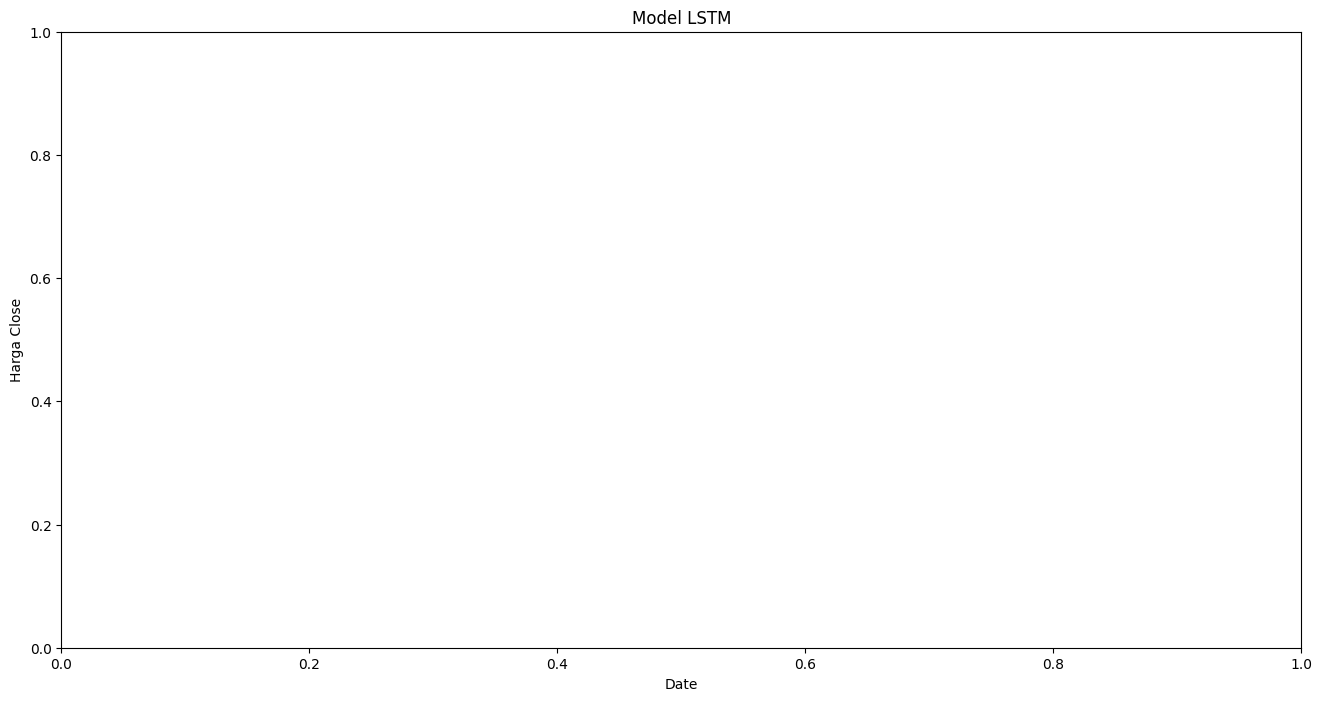

In [36]:

# Visualisasi data
plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Harga Close')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()